In [2]:
import numpy as np
from pathlib import Path
import struct
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm

In [3]:
dataset_path = Path("./MNIST")
train_img_path = dataset_path/'train-images-idx3-ubyte'
train_lab_path = dataset_path/'train-labels-idx1-ubyte'
test_img_path = dataset_path/'t10k-images-idx3-ubyte'
test_lab_path = dataset_path/'t10k-labels-idx1-ubyte'

In [4]:
with open(train_img_path, "rb") as f:
    struct.unpack(">4i", f.read(16))
    tmp_img = np.fromfile(f, dtype=np.uint8).reshape(-1, 28*28)/255
    train_img = tmp_img[:]
with open(test_img_path, "rb") as f:
    struct.unpack(">4i", f.read(16))
    test_img = np.fromfile(f, dtype=np.uint8).reshape(-1, 28*28)/255
with open(train_lab_path, "rb") as f:
    struct.unpack(">2i", f.read(8))
    tmp_lab = np.fromfile(f, dtype=np.uint8).reshape(-1, 1)
    train_lab = tmp_lab[:]
with open(test_lab_path, "rb") as f:
    struct.unpack(">2i", f.read(8))
    test_lab = np.fromfile(f, dtype=np.uint8).reshape(-1, 1)
# len(train_img)

In [5]:
# FUNCTION: show_image(index)
def show_image(img, index):
    plt.imshow(img[index].reshape(28, 28), cmap='gray')
    plt.pause(1)
    # print("label: {}".format(label[index]))
    return 0
# show_image(train_img, train_lab, 30)
# len(train_lab[np.where(train_lab == 9)])

In [6]:
train_num = train_img.shape[0]
test_num = test_img.shape[0]
print(train_img.shape)
print(test_img.shape)
print(train_lab.shape)
train_lab

(60000, 784)
(10000, 784)
(60000, 1)


array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

### <font color="red"> 警示 </font>：
这里创建训练集合，需要对自己指定的数字，比如数字0，和其他数字进行整体的重新建立。并重新赋予图像标签（手写数字为0的标签为1，表示是数字0；其他手写数字标签为0，表示图片上的数字不是0）
也就是讲label转成，数字0对应label设置为1，表示为数字0；其他数字对应label改为0，表示不是数字0

[[0 1 0 ... 0 0 0]]
train set shape: (784, 60000)
train lab shape: (1, 60000)
test set shape: (784, 10000)
test lab shape: (1, 10000)


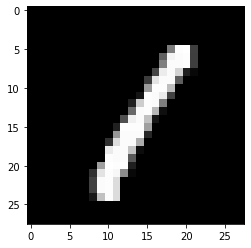

(1, 60000)


5923

In [7]:
# 将给定num的label改为1
def train_setY(num):
    label = train_lab.copy()
    label[np.where(label != num)] = 9
    label[np.where(label == num)] = 1
    label[np.where(label == 9)] = 0
    return label
def test_setY(num):
    label = test_lab.copy()
    label[np.where(label != num)] = 9
    label[np.where(label == num)] = 1
    label[np.where(label == 9)] = 0
    return label
reg_num = 0
limit_train = 60000
limit_test = 10000
train_X = train_img.copy().T[:, :limit_train]
train_Y = train_setY(reg_num).T[:, :limit_train]
print(train_Y)
test_X = test_img.copy().T[:, :limit_test]
test_Y = test_setY(reg_num).T[:, :limit_test]
print(f"train set shape: {train_X.shape}")
print(f"train lab shape: {train_Y.shape}")
print(f"test set shape: {test_X.shape}")
print(f"test lab shape: {test_Y.shape}")

show_image(train_X.T, 3)
# print(train_Y[30])
print(train_Y.shape)
# print(np.where(train_Y==1))
tmp = train_lab.copy().T[:, :limit_train]
len(tmp[np.where(tmp == reg_num)])

[-0.2   -0.194 -0.188 -0.182 -0.176 -0.17  -0.164 -0.158 -0.152 -0.146
 -0.14  -0.134 -0.128 -0.122 -0.116 -0.11  -0.104 -0.098 -0.092 -0.086
 -0.08  -0.074 -0.068 -0.062 -0.056 -0.05  -0.044 -0.038 -0.032 -0.026
 -0.02  -0.014 -0.008 -0.002  0.004  0.01   0.016  0.022  0.028  0.034
  0.04   0.046  0.052  0.058  0.064  0.07   0.076  0.082  0.088  0.094
  0.1  ]


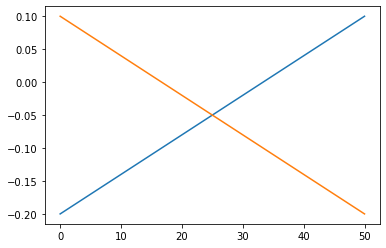

In [18]:
parameters = {
    'a+': 1e-2, 'b+': 0,
    'a-': 1e-2, 'b-': 0,
    'wmax': 1, 'wmin': 0
}
weight_plus_list = [parameters['wmin']]
weight_minus_list = [parameters['wmax']]

def weight_plus(w):
    delta_w = parameters['a+'] * np.exp(-parameters['b+']*(w-parameters['wmin'])
                                             /(parameters['wmax']-parameters['wmin']))
    return w+delta_w
def weight_minus(w):
    delta_w = parameters['a-'] * np.exp(-parameters['b-']*(parameters['wmax']-w)
                                             /(parameters['wmax']-parameters['wmin']))
    return w-delta_w
def equation():
    count_num = 0
    while True:
        weight_plus_list.append(weight_plus(weight_plus_list[-1]))
        weight_minus_list.append(weight_minus(weight_minus_list[-1]))
        count_num += 1
        if weight_plus_list[-1] >= 1:
            break
        elif count_num == 50:
            break
        else:
            continue

    wpl = [0.3*(each - weight_plus_list[0]) / (weight_plus_list[-1]-weight_plus_list[0])-0.2 for each in weight_plus_list]
    wml = [0.3*(each - weight_minus_list[-1]) / (weight_minus_list[0]-weight_minus_list[-1])-0.2 for each in weight_minus_list]
    
    return np.array(wpl), np.array(wml)
GP, GD = equation()
print(GP)
# print(GD)
plt.plot(GP)
plt.plot(GD)
plt.show()

In [19]:
def findGP_num(data, find_array=GP):
    diff = abs(data - find_array)
    index = np.where(diff == np.min(diff))[0][0]
    # print(index)
    return find_array[index]

def findGD_num(data, find_array=GD):
    diff = abs(data - find_array)
    index = np.where(diff == np.min(diff))[0][0]
    return find_array[index]

def each_change(matrix_old, gradw):
    matrix_new = matrix_old.copy()
    for i in range(matrix_old.shape[0]):
        if gradw[i] < 0:
            matrix_new[i] = findGP_num(matrix_old[i])
        else:
            matrix_new[i] = findGD_num(matrix_old[i])
    return matrix_new
# tmp = np.zeros((10, 1))
# each_change(tmp, [0]*len(tmp))

In [20]:
# 激活函数
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-1.0*z))
    return s

# 参数初始化
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
#     plt.imshow(w.reshape((28,28)))
#     plt.pause(1)
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    w = each_change(w, [-1]*dim)
    
    return w, b

# 向前传播
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1.0/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    dw = (1.0/m) * np.dot(X, (A-Y).T)
    db = (1.0/m) * np.sum(A-Y)
    
#     print(f"(A-Y).shape: {(A-Y).shape}")
#     print(f"X.shape: {X.shape}")
#     print(f"w.shape: {w.shape}")
#     print(f"dw.shape: {dw.shape}")
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        "dw": dw,
        "db": db
    }
    
    return grads, cost

# 参数优化
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #######
        w = each_change(w, [0]*len(w))
        #######
        
        if i%100 == 0:
            costs.append(cost)
            print(f"w max:{np.max(w)}, w min:{np.min(w)}")
            print(f"dw max:{np.max(dw)}, dw min:{np.min(dw)}")
#         if i == num_iterations/2 or i == num_iterations-1:
#             w_tmp = w.copy()
#             plt.imshow(w_tmp.reshape((28,28)))
#             plt.pause(1)
        if print_cost and i%100 == 0:
            print("Cost after iterations %i: %f" %(i, cost))
        
    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }

    return params, grads, costs

# 模型预测
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

w max:0.003999999999999976, w min:-0.12200000000000001
dw max:0.24428340754427894, dw min:-0.013243485222467101
Cost after iterations 0: 0.623356
w max:0.09999999999999998, w min:-0.2
dw max:0.009055304788304035, dw min:-0.006724304933122486
Cost after iterations 100: 0.087432
w max:0.09999999999999998, w min:-0.2
dw max:0.008333309826470963, dw min:-0.006681886127729315
Cost after iterations 200: 0.083566
w max:0.09999999999999998, w min:-0.2
dw max:0.007874306502035812, dw min:-0.006853397061436811
Cost after iterations 300: 0.081391
w max:0.09999999999999998, w min:-0.2
dw max:0.007660592380294104, dw min:-0.006672083832521095
Cost after iterations 400: 0.079780
w max:0.09999999999999998, w min:-0.2
dw max:0.007377620379147127, dw min:-0.006955619874329629
Cost after iterations 500: 0.078975
w max:0.09999999999999998, w min:-0.2
dw max:0.007227715750793099, dw min:-0.007005164442293134
Cost after iterations 600: 0.078342
w max:0.09999999999999998, w min:-0.2
dw max:0.007136445812277

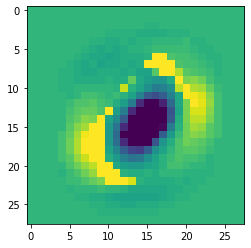

In [22]:
d = model(train_X, train_Y, test_X, test_Y, num_iterations=1000, learning_rate=0.5, print_cost=True)
w = d["w"].copy()
# w[np.where(w<=0)] = 0
plt.imshow(w.reshape((28,28)))

In [138]:
np.where(w>0)

(array([], dtype=int64), array([], dtype=int64))